In [41]:
%matplotlib inline

#matplotlib.use("Agg")

# USAGE
# python train_simple_nn.py --dataset animals --model output/simple_nn.model --label-bin output/simple_nn_lb.pickle --plot output/simple_nn_plot.png

# set the matplotlib backend so figures can be saved in the background


In [42]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os


In [43]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True, help="path to input dataset of images", )
# ap.add_argument("-m", "--model", required=True, help="path to output trained model")
# ap.add_argument("-l", "--label-bin", required=True, help="path to output label binarizer")
# ap.add_argument("-p", "--plot", required=True, help="path to output accuracy/loss plot")
# args = vars(ap.parse_args())


In [44]:
# construct the argument parser and parse the arguments
args = {
  "dataset": "animals", # path to input dataset of images
  "model": "output/simple_nn.model",    # path to output trained model
  "label-bin": "output/simple_nn_lb.pickle",# path to output label binarizer
  "plot":"output/simple_nn_plot.png"       # path to output accuracy/loss plot
}


In [45]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []


[INFO] loading images...


In [46]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(args["dataset"])))
random.seed(42)
random.shuffle(imagePaths)


In [47]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), flatten the image into 32x32x3=3072 pixel image
    # into a list, and store the image in the data list
    #print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [48]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing

In [49]:
(trainX, testX, trainY, testY) = train_test_split(data,	labels, test_size=0.25, random_state=42)


convert the labels from integers to vectors (for 2-class, binary classification you should use Keras' to_categorical function
instead as the scikit-learn's LabelBinarizer will not return a vector)


In [50]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [51]:
# Create keras model
#import pdb;pdb.set_trace()
# define the 3072-1024-512-3 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))


In [52]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 75


compile the model using SGD as our optimizer and categorical cross-entropy loss (you'll want to use binary_crossentropy for 2-class classification)


In [53]:
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


[INFO] training network...


In [54]:
# train the neural network
%time
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

Wall time: 0 ns
Train on 2250 samples, validate on 750 samples
Epoch 1/75
2250/2250 [==============================] - 3s 1ms/step - loss: 1.1036 - acc: 0.3498 - val_loss: 1.0819 - val_acc: 0.4280
Epoch 2/75
2250/2250 [==============================] - 2s 939us/step - loss: 1.0818 - acc: 0.3964 - val_loss: 1.1210 - val_acc: 0.3147
Epoch 3/75
2250/2250 [==============================] - 2s 930us/step - loss: 1.0679 - acc: 0.4018 - val_loss: 1.0584 - val_acc: 0.4120
Epoch 4/75
2250/2250 [==============================] - 2s 929us/step - loss: 1.0479 - acc: 0.4378 - val_loss: 1.0347 - val_acc: 0.4947
Epoch 5/75
2250/2250 [==============================] - 2s 937us/step - loss: 1.0341 - acc: 0.4667 - val_loss: 1.0110 - val_acc: 0.5293
Epoch 6/75
2250/2250 [==============================] - 2s 945us/step - loss: 1.0189 - acc: 0.4884 - val_loss: 1.0377 - val_acc: 0.4747
Epoch 7/75
2250/2250 [==============================] - 2s 931us/step - loss: 1.0020 - acc: 0.5133 - val_loss: 1.0745 - val

2250/2250 [==============================] - 2s 921us/step - loss: 0.7939 - acc: 0.6022 - val_loss: 0.8534 - val_acc: 0.5440
Epoch 61/75
2250/2250 [==============================] - 2s 919us/step - loss: 0.7954 - acc: 0.5898 - val_loss: 0.8533 - val_acc: 0.5893
Epoch 62/75
2250/2250 [==============================] - 2s 916us/step - loss: 0.7884 - acc: 0.6058 - val_loss: 0.8319 - val_acc: 0.5707
Epoch 63/75
2250/2250 [==============================] - 2s 921us/step - loss: 0.7853 - acc: 0.6004 - val_loss: 0.8141 - val_acc: 0.6200
Epoch 64/75
2250/2250 [==============================] - 2s 915us/step - loss: 0.7906 - acc: 0.5911 - val_loss: 0.8172 - val_acc: 0.6067
Epoch 65/75
2250/2250 [==============================] - 2s 920us/step - loss: 0.7853 - acc: 0.6080 - val_loss: 0.8546 - val_acc: 0.5640
Epoch 66/75
2250/2250 [==============================] - 2s 921us/step - loss: 0.7811 - acc: 0.6191 - val_loss: 0.8159 - val_acc: 0.6080
Epoch 67/75
2250/2250 [==============================

In [55]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

        cats       0.48      0.81      0.61       236
        dogs       0.44      0.23      0.30       236
       panda       0.80      0.68      0.74       278

   micro avg       0.58      0.58      0.58       750
   macro avg       0.58      0.57      0.55       750
weighted avg       0.59      0.58      0.56       750



We see an overall accuracy of 60% which is not so good. It looks like that panda class has the best accuracy 
while cats class has the second best.
let's try to see where we get the best accuracy.


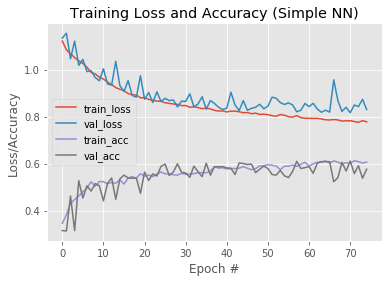

In [38]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.legend()



In [39]:
plt.savefig(args["plot"])

<Figure size 432x288 with 0 Axes>

In [40]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save(args["model"])
f = open(args["label-bin"], "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...
